# HEALTH PLOT

In [378]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [379]:
consumer_df = pd.read_csv('CleanedMelissaData.csv')
consumer_df.columns

Index(['City', 'Zipcode', 'Latitude', 'Longitude', 'OwnerRenter', 'Charitable',
       'Health', 'Political', 'Religious', 'Veteran', 'MaritalStatus',
       'SingleParent', 'NumberOfChildren', 'HouseholdSize', 'NetWorth',
       'SelfImprovement', 'MusicCollector', 'MovieCollector', 'Photography',
       'AutoWork', 'Fishing', 'CampingHiking', 'HuntingShooting', 'Gardening',
       'HomeImprovement', 'HomeImprovementDIY', 'OutdoorsGrouping', 'TVCable'],
      dtype='object')

In [380]:
consumer_df['Health'] = consumer_df['Health'].apply(lambda x: 1 if x == 'Y' else 0)


# Data Preprocessing

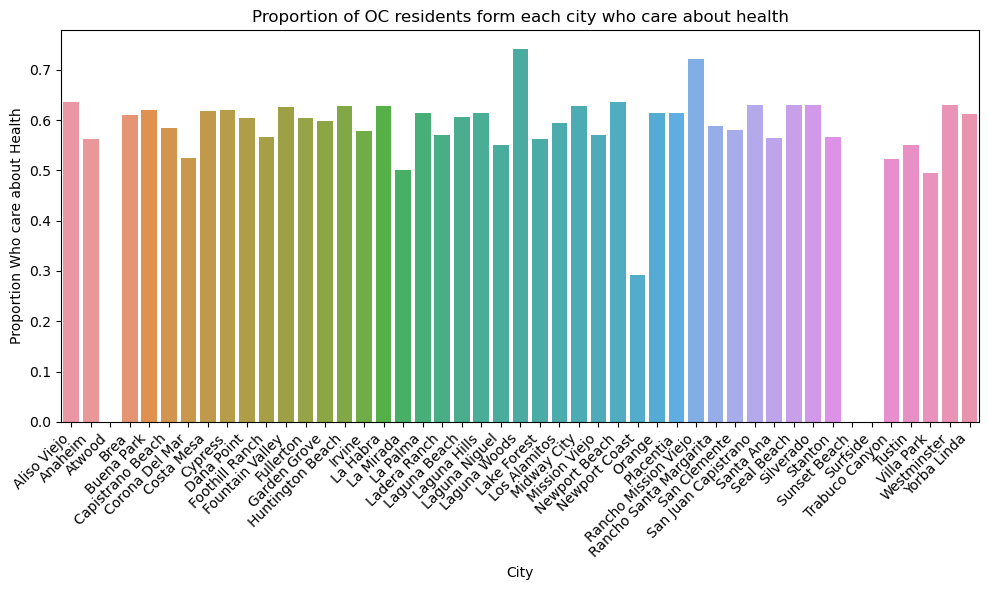

In [381]:
count = consumer_df_new_1.groupby('City').agg({'Health': 'count'})
                                                #, 'proportion': lambda x: x.sum() / x.count()})
summ = consumer_df_new_1.groupby('City').agg({'Health': 'sum'})

sum_and_count = pd.concat([count,summ],axis=1)
sum_and_count.columns = ['count','sum']
sum_and_count['prop'] = sum_and_count['sum']/ sum_and_count['count']

sum_and_count
plt.figure(figsize=(10, 6))
ax = sns.barplot(x= sum_and_count.index,y=sum_and_count['prop'])
ax.set(xlabel ="City", ylabel = "Proportion Who care about Health", title ='Proportion of OC residents form each city who care about health')
plt.xticks(rotation=45, ha = 'right')
plt.tight_layout()
plt.show()



In [382]:
def color_grad(value):
    blue = (0, 0, 1)
    
    # Red color (0.8)
    red = (1, 0, 0)
    
    # Interpolate between blue and red based on the value
    r = blue[0] + (red[0] - blue[0]) * ((value - 0.29) / (0.8 - 0.29))
    g = blue[1] + (red[1] - blue[1]) * ((value - 0.29) / (0.8 - 0.29))
    b = blue[2] + (red[2] - blue[2]) * ((value - 0.29) / (0.8 - 0.29))
    
    

    return (r, g, b)

# MORE INLAND LESS WEALTHY 

C:\Users\johnf\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:43: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



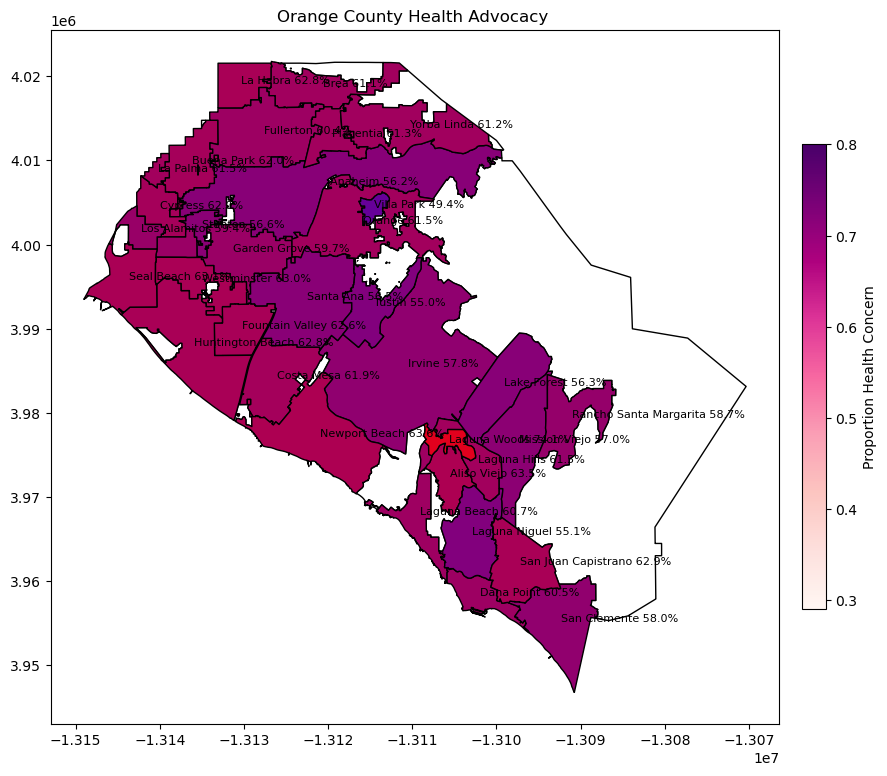

In [383]:
    import geopandas as gpd
    import matplotlib.pyplot as plt
    import matplotlib.colors as mcolors

    # Read the shapefile
    orange_county = gpd.read_file('City.shp')

    # Plot the map
    fig, ax = plt.subplots(figsize=(10, 10))
    colors = [color_grad(sum_and_count['prop'][city])  if city in sum_and_count.index else 'white' for city in orange_county['District']]

    orange_county.plot(ax=ax, color=colors, edgecolor='black')
    
    
#     norm = mcolors.Normalize(vmin=0, vmax=0.8)  # Adjust vmin and vmax according to your data range
#     sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
#     sm.set_array([])
#     plt.colorbar(sm, ax=ax, orientation='vertical', label='Color Key')
    
    norm = mcolors.Normalize(vmin=0.29, vmax=0.8)  # Adjust vmin and vmax according to your data range
    cmap = plt.cm.get_cmap('RdPu_r').reversed()  # Reverse the colormap to go from purple to red
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])

    ax.set_title('Orange County Health Advocacy ')

    # Add city names
    for x, y, label in zip(orange_county.geometry.centroid.x, orange_county.geometry.centroid.y, orange_county['District']):
        ax.text(x, y, label + ' '+ str('{:.1%}'.format(sum_and_count['prop'][label])) if label in sum_and_count.index else '', fontsize=8)

    # Add colorbar
    cbar = plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.03, pad=0.03)
    cbar.set_label('Proportion Health Concern')
    
    plt.show()




<AxesSubplot:xlabel='NetWorth', ylabel='Count'>

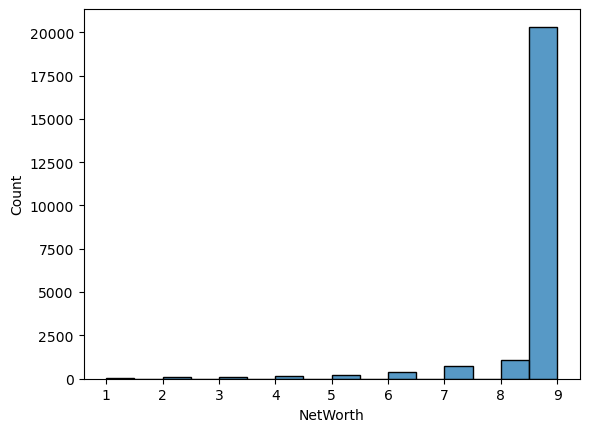

In [384]:
sns.histplot(consumer_df_new_1['NetWorth'])

In [385]:
consumer_df_new_1['NetWorth'].value_counts()

9.0    20320
8.0     1096
7.0      750
6.0      375
5.0      239
4.0      177
2.0       91
3.0       85
1.0       54
Name: NetWorth, dtype: int64

C:\Users\johnf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Health', ylabel='count'>

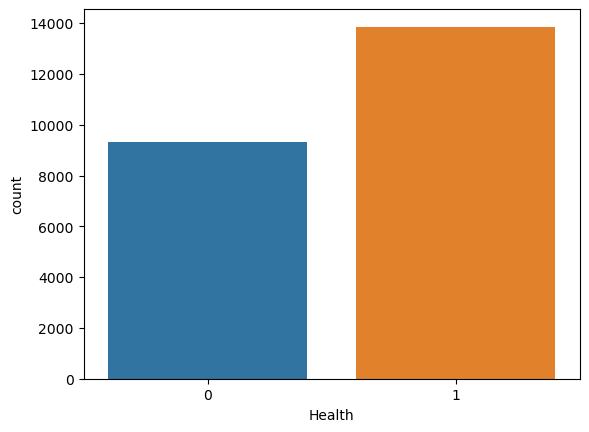

In [386]:
sns.countplot(consumer_df_new_1['Health'])

C:\Users\johnf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='NetWorth'>

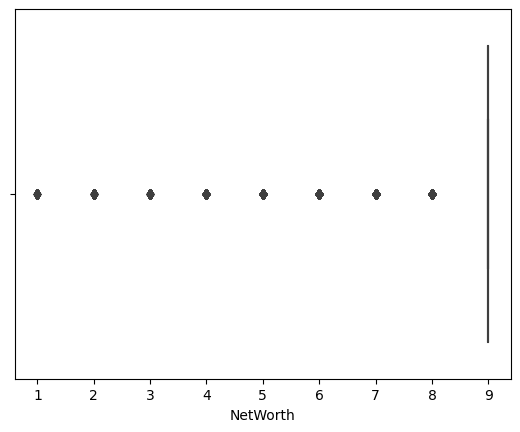

In [387]:
sns.boxplot(consumer_df_new_1['NetWorth'])

In [388]:
def color_grad(value):
    yellow = (1, 1, 0)
    
    # Red color (0.8)
    red = (1, 0, 0)
    
    # Interpolate between yellow and red based on the value
    r = yellow[0] + (red[0] - yellow[0]) * ((value - 0.2) / (0.8 - 0.2))
    g = yellow[1] + (red[1] - yellow[1]) * ((value - 0.2) / (0.8 - 0.2))
    b = yellow[2] + (red[2] - yellow[2]) * ((value - 0.2) / (0.8 - 0.2))
    
    return (r, g, b)









In [389]:
# #religion plots per city

# import geopandas as gpd
# import matplotlib.pyplot as plt
# import matplotlib.colors as mcolors

# consumer_df_new_1['Religious'] = consumer_df_new_1['Religious'].apply(lambda x: 1 if x == 'Y' else 0)

# count = consumer_df_new_1.groupby('City').agg({'Religious': 'count'})
#                                                 #, 'proportion': lambda x: x.sum() / x.count()})
# summ = consumer_df_new_1.groupby('City').agg({'Religious': 'sum'})

# sum_and_count = pd.concat([count,summ],axis=1)
# sum_and_count.columns = ['count','sum']



# sum_and_count['prop'] = sum_and_count['sum']/ sum_and_count['count']



# orange_county = gpd.read_file('City.shp')

#      # Plot the map
# fig, ax = plt.subplots(figsize=(10, 10))
# colors = [color_grad(sum_and_count['prop'][city])  if city in sum_and_count.index else 'white' for city in orange_county['District']]

# orange_county.plot(ax=ax, color=colors, edgecolor='black')
    

    
# norm = mcolors.Normalize(vmin=0.2, vmax=0.6)  # Adjust vmin and vmax according to your data range
# cmap = plt.cm.get_cmap('RdPu_r').reversed()  # Reverse the colormap to go from purple to red
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# sm.set_array([])

# ax.set_title('Orange County Health Advocacy ')

# #     # Add city names
# for x, y, label in zip(orange_county.geometry.centroid.x, orange_county.geometry.centroid.y, orange_county['District']):
#     ax.text(x, y, label + ' '+ str('{:.1%}'.format(sum_and_count['prop'][label])) if label in sum_and_count.index else '', fontsize=8)

# #     # Add colorbar
# cbar = plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.03, pad=0.03)
# cbar.set_label('Color Key')
    
# plt.show()



In [390]:
consumer_df_new_1.columns

Index(['City', 'Zipcode', 'Latitude', 'Longitude', 'OwnerRenter', 'Charitable',
       'Health', 'Political', 'Religious', 'MaritalStatus', 'NumberOfChildren',
       'HouseholdSize', 'NetWorth', 'MovieCollector', 'Photography',
       'AutoWork', 'Fishing', 'CampingHiking', 'HuntingShooting', 'Gardening',
       'HomeImprovement', 'HomeImprovementDIY', 'OutdoorsGrouping', 'TVCable'],
      dtype='object')

C:\Users\johnf\AppData\Local\Temp\ipykernel_30636\213816004.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:xlabel='Health', ylabel='prop'>

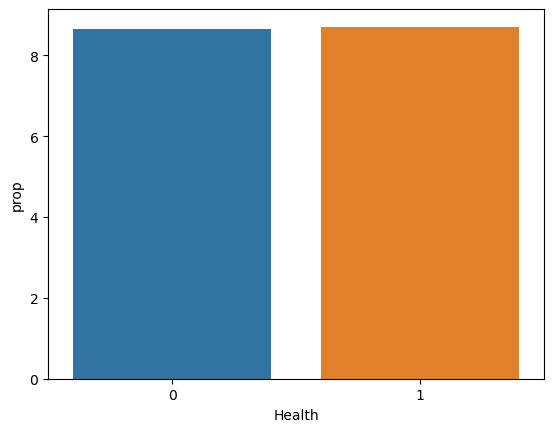

In [391]:
consumer_df_new_1['Religious'] = consumer_df_new_1['Religious'].apply(lambda x: 1 if x == 'Y' else 0)

count = consumer_df_new_1.groupby('Health').agg({'NetWorth': 'count'})
                                                #, 'proportion': lambda x: x.sum() / x.count()})
summ = consumer_df_new_1.groupby('Health').agg({'NetWorth': 'sum'})

sum_and_count = pd.concat([count,summ],axis=1)
sum_and_count.columns = ['count','sum']



sum_and_count['prop'] = sum_and_count['sum']/ sum_and_count['count']


sns.barplot(x=sum_and_count.index,y=sum_and_count['prop'])

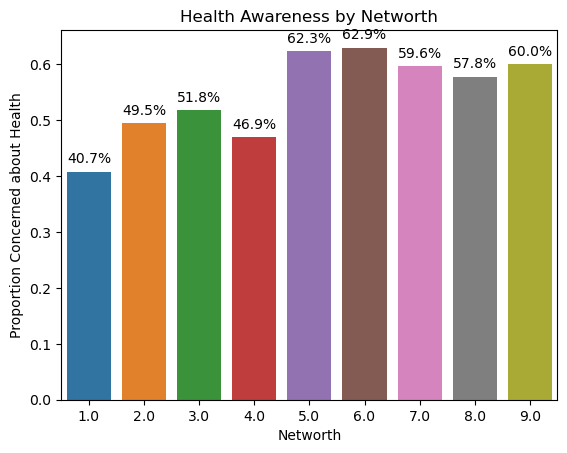

In [401]:
#consumer_df_new_1['Wealth'] = consumer_df_new_1['NetWorth'].apply(lambda x: 2 if x >= 1 and x <=3 else 1 if x >=4 and x <=7 else 0)



count = consumer_df_new_1.groupby('NetWorth').agg({'Health': 'count'})
                                                #, 'proportion': lambda x: x.sum() / x.count()})
summ = consumer_df_new_1.groupby('NetWorth').agg({'Health': 'sum'})

sum_and_count = pd.concat([count,summ],axis=1)
sum_and_count.columns = ['count','sum']



sum_and_count['prop'] = sum_and_count['sum']/ sum_and_count['count']


ax = sns.barplot(x=sum_and_count.index, y=sum_and_count['prop'])

# Add value labels on top of each bar
for bar, value in zip(ax.patches, sum_and_count['prop']):
    ax.text(bar.get_x() + bar.get_width() / 2, 
            bar.get_height() + 0.01,  # Adjust vertical position of the label
            '{:.1%}'.format(value), 
            ha='center', va='bottom')

# Add labels and title
plt.xlabel('Networth')
plt.ylabel('Proportion Concerned about Health')
plt.title('Health Awareness by Networth')
plt.show()

In [393]:
consumer_df_new_1.columns
consumer_df_new_1

,City,Zipcode,Latitude,Longitude,OwnerRenter,Charitable,Health,Political,Religious,MaritalStatus,...,Photography,AutoWork,Fishing,CampingHiking,HuntingShooting,Gardening,HomeImprovement,HomeImprovementDIY,OutdoorsGrouping,TVCable
17,San Clemente,92672,33.446617,-117.601036,O,Y,1,Y,0,M,...,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y
30,Mission Viejo,92691,33.648822,-117.646427,O,Y,1,Y,0,M,...,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y
50,Los Alamitos,90720,33.785641,-118.080703,O,Y,1,Y,0,M,...,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y
111,Fountain Valley,92708,33.693031,-117.975408,O,Y,1,Y,0,S,...,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y
167,Anaheim,92805,33.851878,-117.897211,O,Y,1,Y,0,M,...,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2089433,Garden Grove,92840,33.782787,-117.907523,O,Y,0,Y,0,M,...,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y
2089439,Los Alamitos,90720,33.777358,-118.085587,O,Y,0,Y,0,M,...,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y
2089472,Irvine,92603,33.648681,-117.820594,O,Y,0,Y,0,M,...,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y
2089613,Huntington Beach,92648,33.699443,-118.022498,O,Y,0,Y,0,M,...,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y


In [394]:
# #consumer_df_new_1['Wealth'] = consumer_df_new_1['NetWorth'].apply(lambda x: 2 if x >= 1 and x <=3 else 1 if x >=4 and x <=7 else 0)


# copy_df = pd.DataFrame([consumer_df_new_1['Health'],consumer_df_new_1['HuntingShooting'],consumer_df_new_1['Gardening']])


# # Assuming you have defined consumer_df_new_1 DataFrame and copy_df as mentioned in your code

# plt.figure(figsize=(10, 6))
# for index, column in copy_df.iteritems():  # Iterate over columns instead of rows
#     plt.bar(index - 0.1, column['HuntingShooting'], width=0.2, label='Hunting')
#     plt.bar(index + 0.1, column['Gardening'], width=0.2, label='Gardening')

# plt.title('Hunting vs Gardening')
# plt.xlabel('Index')
# # plt.ylabel('Value')
# plt.xticks(range(len(copy_df.columns)), copy_df.columns)  # Use copy_df.columns for xticks
# plt.legend()
# plt.show()
